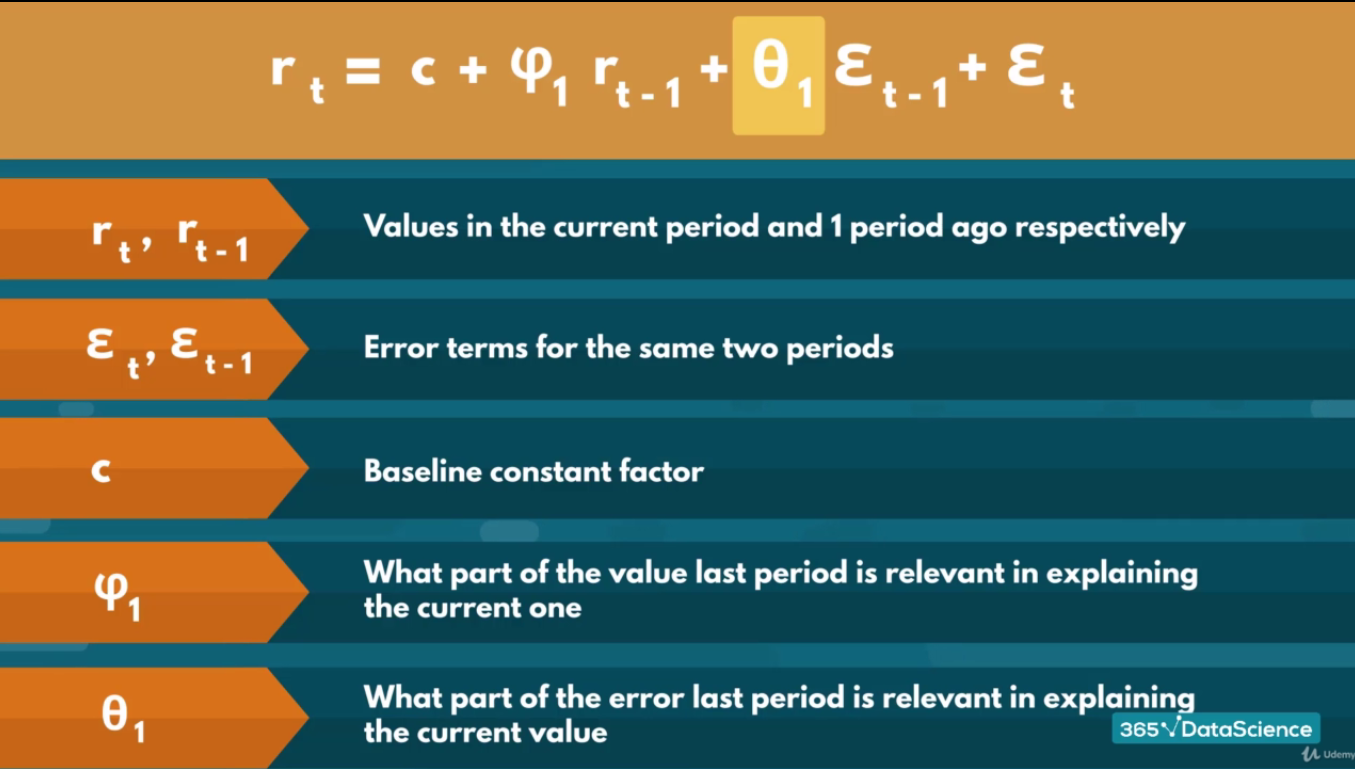

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.stattools as sts
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

In [2]:
raw_csv_data = pd.read_csv("013 IndexE8.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date,dayfirst=True)
df_comp.set_index("date",inplace=True)
df_comp = df_comp.asfreq("b")
df_comp = df_comp.fillna(method="ffill")

In [3]:
df_comp['market_value'] = df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [5]:
df["returns"] = df.market_value.pct_change(1).mul(100)
df.head()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,market_value,returns
date,,
1994-01-07,3445.98,NaN
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166


In [7]:
def LLR_test(mod_1,mod_2, df=1):
    l1 = mod_1.fit().llf
    l2 = mod_2.fit().llf
    LR = (2*(l2-l1))
    p = chi2.sf(LR,df).round(3)
    return p

In [6]:
# ARMA(1)

model_ret_ar_1_ma_1 = ARMA(df.returns[1:],order=(1,1))
resutls_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
resutls_ret_ar_1_ma_1.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood               -7916.500
Method:                       css-mle   S.D. of innovations              1.171
Date:                Sun, 04 Apr 2021   AIC                          15841.000
Time:                        11:02:30   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.446      0.148      -0.007       0.045
ar.L1.returns     0.7649      0.067     11.349      0.000       0.633       0.897
ma.L1.returns    -0.8141      0.061    -13.406      0.000      -0.933      -0.695
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3074           +0.0000j            1.3074            0.0000
MA.1            1.2284           +0.0000j            1.2284            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# Here ar.L1.returns 0.76 i.e. above(75%) shows a positive tendency b/w past and present values
# returns move in trends of consequtive positive or negative values
# periods of persistent increase or decreases when translated to prices

# while
# The value ma.L1.returns -0.8141 is harder to interpret, suggests we should be moving away from the past period (t-1) values

# These past error terms ensure we don't get a "Fool in the shower" type of error

In [ ]:
# Before moving to more complex ARMA models, we have to first check the log likelihood test for individual ar(1) and ma(1) models

In [8]:
model_ret_ar_1 = ARMA(df.returns[1:],order=(1,0))
model_ret_ma_1 = ARMA(df.returns[1:],order=(0,1))

print("\nARMA vs AR", LLR_test(model_ret_ar_1,model_ret_ar_1_ma_1))
print("\nARMA vs MA", LLR_test(model_ret_ma_1,model_ret_ar_1_ma_1))

# It suggest using past errors in conjuction with past values results in much better estimators

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)



ARMA vs AR 0.0

ARMA vs MA 0.0


In [ ]:
# Higher lags ARMA models 

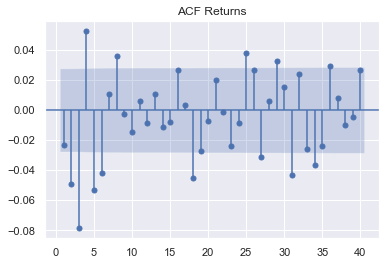

In [18]:
sgt.plot_acf(df.returns[1:],zero=False,lags=40)
plt.title("ACF Returns")
plt.show()

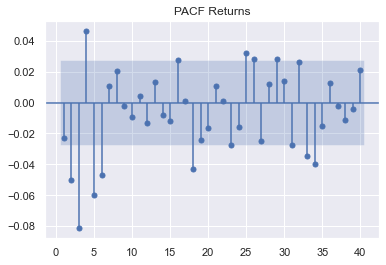

In [19]:
sgt.plot_pacf(df.returns[1:],zero=False,lags=40)
plt.title("PACF Returns")
plt.show()

In [ ]:
# Generally the AR and MA models complement one another, so the optimal ARMA model would contain fewer components
# of each type 

In [20]:
model_ret_ar_3_ma_3 = ARMA(df.returns[1:],order=(3,3))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()
results_ret_ar_3_ma_3.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 3)   Log Likelihood               -7893.515
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sun, 04 Apr 2021   AIC                          15803.030
Time:                        11:45:39   BIC                          15855.199
Sample:                    01-10-1994   HQIC                         15821.310
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.395      0.163      -0.008       0.045
ar.L1.returns    -0.1898      0.104     -1.827      0.068      -0.393       0.014
ar.L2.returns    -0.2942      0.087     -3.389      0.001      -0.464      -0.124
ar.L3.returns     0.4459      0.138      3.225      0.001       0.175       0.717
ma.L1.returns     0.1707      0.099      1.726      0.084      -0.023       0.365
ma.L2.returns     0.2277      0.084      2.701      0.007       0.062       0.393
ma.L3.returns    -0.5432      0.127     -4.270      0.000      -0.793      -0.294
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5168           -1.0283j            1.1508           -0.3241
AR.2           -0.5168           +1.0283j            1.1508            0.3241
AR.3            1.6932           -0.0000j            1.6932           -0.0000
MA.1           -0.5286           -0.9835j            1.1166           -0.3285
MA.2           -0.5286           +0.9835j            1.1166            0.3285
MA.3            1.4764           -0.0000j            1.4764           -0.0000
-----------------------------------------------------------------------------
"""

In [22]:
LLR_test(model_ret_ar_1_ma_1,model_ret_ar_3_ma_3, df=4)

0.0

In [23]:
#above the 3,3 model is better than 1,1 but 3,3 has a few insignificant p values, hence our model should rely b/w them

In [24]:
model_ret_ar_3_ma_2 = ARMA(df.returns[1:],order=(3,2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()
results_ret_ar_3_ma_2.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 2)   Log Likelihood               -7895.747
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sun, 04 Apr 2021   AIC                          15805.495
Time:                        11:58:37   BIC                          15851.143
Sample:                    01-10-1994   HQIC                         15821.491
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.251      0.211      -0.011       0.048
ar.L1.returns    -0.6785      0.087     -7.799      0.000      -0.849      -0.508
ar.L2.returns    -0.5088      0.139     -3.670      0.000      -0.780      -0.237
ar.L3.returns    -0.1141      0.015     -7.655      0.000      -0.143      -0.085
ma.L1.returns     0.6568      0.087      7.536      0.000       0.486       0.828
ma.L2.returns     0.4474      0.141      3.175      0.001       0.171       0.724
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4929           -1.5101j            1.5885           -0.3002
AR.2           -0.4929           +1.5101j            1.5885            0.3002
AR.3           -3.4748           -0.0000j            3.4748           -0.5000
MA.1           -0.7340           -1.3025j            1.4951           -0.3317
MA.2           -0.7340           +1.3025j            1.4951            0.3317
-----------------------------------------------------------------------------
"""

In [25]:
LLR_test(model_ret_ar_1_ma_1,model_ret_ar_3_ma_2,df=3) # not a good idea to check here

0.0

In [26]:
# also notice the ar.L1,l2,l3 going down , the further back in time we go, the less relevent values and errors become

In [27]:
model_ret_ar_2_ma_3 = ARMA(df.returns[1:],order=(2,3))
results_ret_ar_2_ma_3 = model_ret_ar_2_ma_3.fit()
results_ret_ar_2_ma_3.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 3)   Log Likelihood               -7895.587
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sun, 04 Apr 2021   AIC                          15805.174
Time:                        12:07:02   BIC                          15850.823
Sample:                    01-10-1994   HQIC                         15821.170
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.276      0.202      -0.010       0.048
ar.L1.returns    -0.5605      0.090     -6.245      0.000      -0.736      -0.385
ar.L2.returns    -0.4187      0.193     -2.172      0.030      -0.796      -0.041
ma.L1.returns     0.5378      0.090      6.001      0.000       0.362       0.714
ma.L2.returns     0.3540      0.195      1.818      0.069      -0.028       0.736
ma.L3.returns    -0.1158      0.016     -7.369      0.000      -0.147      -0.085
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6694           -1.3930j            1.5455           -0.3213
AR.2           -0.6694           +1.3930j            1.5455            0.3213
MA.1           -0.7270           -1.1772j            1.3836           -0.3381
MA.2           -0.7270           +1.1772j            1.3836            0.3381
MA.3            4.5096           -0.0000j            4.5096           -0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# above a coeff is not significant hence we won't use this model

In [28]:
LLR_test(model_ret_ar_2_ma_3,model_ret_ar_3_ma_3)

0.042

In [ ]:
# It suggest we should opt for arma(3,3) model instead of (2,3) if we had to choose ONLY b/w these two

In [29]:
model_ret_ar_3_ma_1 = ARMA(df.returns[1:],order=(3,1))
results_ret_ar_3_ma_1 = model_ret_ar_3_ma_1.fit()
results_ret_ar_3_ma_1.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 1)   Log Likelihood               -7899.072
Method:                       css-mle   S.D. of innovations              1.167
Date:                Sun, 04 Apr 2021   AIC                          15810.144
Time:                        12:11:00   BIC                          15849.271
Sample:                    01-10-1994   HQIC                         15823.855
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.298      0.194      -0.010       0.047
ar.L1.returns    -0.5077      0.088     -5.769      0.000      -0.680      -0.335
ar.L2.returns    -0.0638      0.016     -4.023      0.000      -0.095      -0.033
ar.L3.returns    -0.1102      0.014     -7.850      0.000      -0.138      -0.083
ma.L1.returns     0.4839      0.088      5.500      0.000       0.311       0.656
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5095           -0.0000j            1.5095           -0.5000
AR.2            0.4653           -2.4076j            2.4521           -0.2196
AR.3            0.4653           +2.4076j            2.4521            0.2196
MA.1           -2.0668           +0.0000j            2.0668            0.5000
-----------------------------------------------------------------------------
"""

In [30]:
LLR_test(model_ret_ar_3_ma_1,model_ret_ar_3_ma_2) # put simpler model first 

0.01

In [31]:
model_ret_ar_2_ma_2 = ARMA(df.returns[1:],order=(2,2))
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
results_ret_ar_2_ma_2.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 2)   Log Likelihood               -7913.223
Method:                       css-mle   S.D. of innovations              1.170
Date:                Sun, 04 Apr 2021   AIC                          15838.446
Time:                        12:13:15   BIC                          15877.573
Sample:                    01-10-1994   HQIC                         15852.156
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.394      0.163      -0.008       0.045
ar.L1.returns     0.7820      0.238      3.284      0.001       0.315       1.249
ar.L2.returns    -0.1563      0.177     -0.884      0.377      -0.503       0.190
ma.L1.returns    -0.8105      0.239     -3.388      0.001      -1.279      -0.342
ma.L2.returns     0.1177      0.187      0.628      0.530      -0.250       0.485
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.5017           -0.3738j            2.5295           -0.0236
AR.2            2.5017           +0.3738j            2.5295            0.0236
MA.1            1.6107           +0.0000j            1.6107            0.0000
MA.2            5.2739           +0.0000j            5.2739            0.0000
-----------------------------------------------------------------------------
"""

In [32]:
model_ret_ar_1_ma_3 = ARMA(df.returns[1:],order=(1,3))
results_ret_ar_1_ma_3 = model_ret_ar_1_ma_3.fit()
results_ret_ar_1_ma_3.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 3)   Log Likelihood               -7896.838
Method:                       css-mle   S.D. of innovations              1.167
Date:                Sun, 04 Apr 2021   AIC                          15805.676
Time:                        12:14:14   BIC                          15844.803
Sample:                    01-10-1994   HQIC                         15819.386
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.332      0.183      -0.009       0.047
ar.L1.returns    -0.4699      0.096     -4.901      0.000      -0.658      -0.282
ma.L1.returns     0.4474      0.095      4.691      0.000       0.260       0.634
ma.L2.returns    -0.0637      0.015     -4.113      0.000      -0.094      -0.033
ma.L3.returns    -0.1182      0.014     -8.200      0.000      -0.146      -0.090
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1282           +0.0000j            2.1282            0.5000
MA.1           -1.4882           -1.1206j            1.8629           -0.3973
MA.2           -1.4882           +1.1206j            1.8629            0.3973
MA.3            2.4376           -0.0000j            2.4376           -0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# above a good model, ususally we'll go on to use the log-likelihood ratio test here to compare it with the ARMA(3,2)
# but arma(3,2) and arma(1,3) are not "nested"

# so we'll manually compare the log likelihood and AIC of the models:
# our model should have higher llr and lower AIC

In [ ]:
# for a model to be nested it must follow the following three conditions

# suppose two models arma(p1,q1) , arma(p2,q2)

# a. p1 + q1 > p2 + q2
# b. p1 >= p2
# c. q1 >= q2

In [34]:
print("ARMA (3,2) ",results_ret_ar_3_ma_2.llf,results_ret_ar_3_ma_2.aic)
print("ARMA (1,3) ",results_ret_ar_1_ma_3.llf,results_ret_ar_1_ma_3.aic)

# here 3,2 is better

ARMA (3,2)  -7895.7474585148175 15805.494917029635
ARMA (1,3)  -7896.837893752834 15805.675787505668


In [ ]:
# arma 3,2 , all significant coefficents, outpredicts all less-complex alternatives

In [ ]:
# now examining it's residuals

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


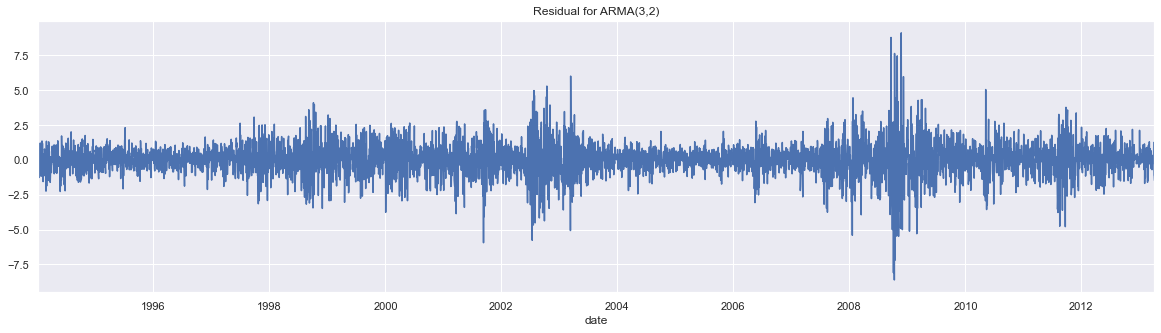

In [35]:
df['res_ret_ar_3_ma_2'] = results_ret_ar_3_ma_2.resid
df.res_ret_ar_3_ma_2.plot(figsize=(20,5))
plt.title("Residual for ARMA(3,2)")
plt.show()

In [36]:
# This is similar to AR and MA models, and looks like white noise
# the volatility in returns might not be fully comprehendable if we use only ARMA models
# to make sure the residuals are random we plot acf

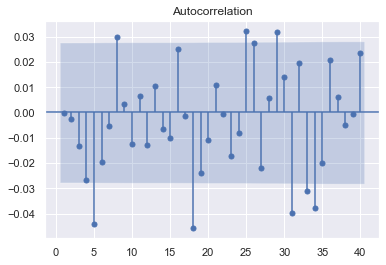

In [38]:
sgt.plot_acf(df.res_ret_ar_3_ma_2[1:],lags=40,zero=False)
plt.show()

In [ ]:
# clearly we have more significant lags than AR and MA models
# accounting for either returns or residuals 5 periods ago, could improve our predicitons, so let's fit the ARMA(5,5)
# or ARMA(5,Q), ARMA(P,5), then compare log-liklihood and AIC values for each other

In [39]:
model_ret_ar_5_ma_5 = ARMA(df.returns[1:],order=(5,5))
results_ret_ar_5_ma_5 = model_ret_ar_5_ma_5.fit()
results_ret_ar_5_ma_5.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 5)   Log Likelihood               -7882.160
Method:                       css-mle   S.D. of innovations              1.163
Date:                Sun, 04 Apr 2021   AIC                          15788.321
Time:                        13:33:47   BIC                          15866.575
Sample:                    01-10-1994   HQIC                         15815.742
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.402      0.161      -0.008       0.045
ar.L1.returns    -0.0684      0.140     -0.490      0.624      -0.342       0.205
ar.L2.returns    -0.6722      0.146     -4.603      0.000      -0.958      -0.386
ar.L3.returns    -0.1152      0.141     -0.817      0.414      -0.392       0.161
ar.L4.returns     0.1779      0.129      1.381      0.167      -0.075       0.430
ar.L5.returns     0.1215      0.107      1.132      0.258      -0.089       0.332
ma.L1.returns     0.0443      0.138      0.322      0.748      -0.226       0.314
ma.L2.returns     0.6223      0.144      4.321      0.000       0.340       0.905
ma.L3.returns     0.0107      0.136      0.079      0.937      -0.256       0.277
ma.L4.returns    -0.1753      0.122     -1.436      0.151      -0.415       0.064
ma.L5.returns    -0.2240      0.104     -2.148      0.032      -0.428      -0.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0870           -1.0364j            1.0401           -0.2367
AR.2            0.0870           +1.0364j            1.0401            0.2367
AR.3            1.7715           -0.0000j            1.7715           -0.0000
AR.4           -1.7050           -1.1784j            2.0726           -0.4038
AR.5           -1.7050           +1.1784j            2.0726            0.4038
MA.1            0.1033           -1.0434j            1.0485           -0.2343
MA.2            0.1033           +1.0434j            1.0485            0.2343
MA.3            1.4855           -0.0000j            1.4855           -0.0000
MA.4           -1.2373           -1.0965j            1.6532           -0.3846
MA.5           -1.2373           +1.0965j            1.6532            0.3846
-----------------------------------------------------------------------------
"""

In [ ]:
# It has only three significant p values, hence taking returns and residuals 5 period ago is redundant
# We should only focus one of the two

In [40]:
# So, check all the remaining 8 ARMA models, to see which yeild significant coeffs, at 5% significance level:
# ARMA(1,5), ARMA(2,5), ARMA(3,5), ARMA(4,5), ARMA(5,1), ARMA(5,2) ,ARMA(5,3) ,ARMA(5,4)

# and turned out arma(1,5) and arma(5,1) are viable models (same dof can't apply llr test)

In [41]:
model_ret_ar_5_ma_1 = ARMA(df.returns[1:],order=(5,1))
results_ret_ar_5_ma_1 = model_ret_ar_5_ma_1.fit()
results_ret_ar_5_ma_1.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 1)   Log Likelihood               -7889.311
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sun, 04 Apr 2021   AIC                          15794.623
Time:                        13:41:03   BIC                          15846.792
Sample:                    01-10-1994   HQIC                         15812.903
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.407      0.159      -0.007       0.045
ar.L1.returns     0.3440      0.131      2.624      0.009       0.087       0.601
ar.L2.returns    -0.0458      0.015     -3.005      0.003      -0.076      -0.016
ar.L3.returns    -0.0652      0.016     -4.010      0.000      -0.097      -0.033
ar.L4.returns     0.0741      0.018      4.068      0.000       0.038       0.110
ar.L5.returns    -0.0813      0.014     -5.688      0.000      -0.109      -0.053
ma.L1.returns    -0.3673      0.131     -2.801      0.005      -0.624      -0.110
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6158           -0.0000j            1.6158           -0.5000
AR.2            1.3793           -0.8613j            1.6261           -0.0888
AR.3            1.3793           +0.8613j            1.6261            0.0888
AR.4           -0.1156           -1.6929j            1.6968           -0.2608
AR.5           -0.1156           +1.6929j            1.6968            0.2608
MA.1            2.7223           +0.0000j            2.7223            0.0000
-----------------------------------------------------------------------------
"""

In [42]:
model_ret_ar_1_ma_5 = ARMA(df.returns[1:],order=(1,5))
results_ret_ar_1_ma_5 = model_ret_ar_1_ma_5.fit()
results_ret_ar_1_ma_5.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 5)   Log Likelihood               -7890.973
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sun, 04 Apr 2021   AIC                          15797.947
Time:                        13:41:29   BIC                          15850.116
Sample:                    01-10-1994   HQIC                         15816.228
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.419      0.156      -0.007       0.045
ar.L1.returns     0.3285      0.152      2.159      0.031       0.030       0.627
ma.L1.returns    -0.3534      0.152     -2.332      0.020      -0.650      -0.056
ma.L2.returns    -0.0404      0.015     -2.624      0.009      -0.071      -0.010
ma.L3.returns    -0.0679      0.017     -4.022      0.000      -0.101      -0.035
ma.L4.returns     0.0742      0.020      3.771      0.000       0.036       0.113
ma.L5.returns    -0.0683      0.015     -4.660      0.000      -0.097      -0.040
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.0443           +0.0000j            3.0443            0.0000
MA.1           -1.1897           -1.1548j            1.6580           -0.3774
MA.2           -1.1897           +1.1548j            1.6580            0.3774
MA.3            1.5041           -0.0000j            1.5041           -0.0000
MA.4            0.9809           -1.6057j            1.8815           -0.1627
MA.5            0.9809           +1.6057j            1.8815            0.1627
-----------------------------------------------------------------------------
"""

In [43]:
print("ARMA (5,1) ",results_ret_ar_5_ma_1.llf,results_ret_ar_5_ma_1.aic)
print("ARMA (1,5) ",results_ret_ar_1_ma_5.llf,results_ret_ar_1_ma_5.aic)

# Suggest 5,1 is superior

ARMA (5,1)  -7889.311282945808 15794.622565891616
ARMA (1,5)  -7890.973460209439 15797.946920418877


In [ ]:
# Now in the race of final best model, there are two contestants, arma(3,2) and arma(5,1), (we cant apply llr test)

In [44]:
print("ARMA (3,2) ",results_ret_ar_3_ma_2.llf,results_ret_ar_3_ma_2.aic)
print("ARMA (5,1) ",results_ret_ar_5_ma_1.llf,results_ret_ar_5_ma_1.aic)

# again ARMA(5,1) is superior

ARMA (3,2)  -7895.7474585148175 15805.494917029635
ARMA (5,1)  -7889.311282945808 15794.622565891616


In [ ]:
# The AR and MA models have PACF, and ACF but ARMA doesn't, so we can make a mistake of starting off with a model,
# whose order is lower than the optimal one, this is why it is crucial to examine the residual to find the best model

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


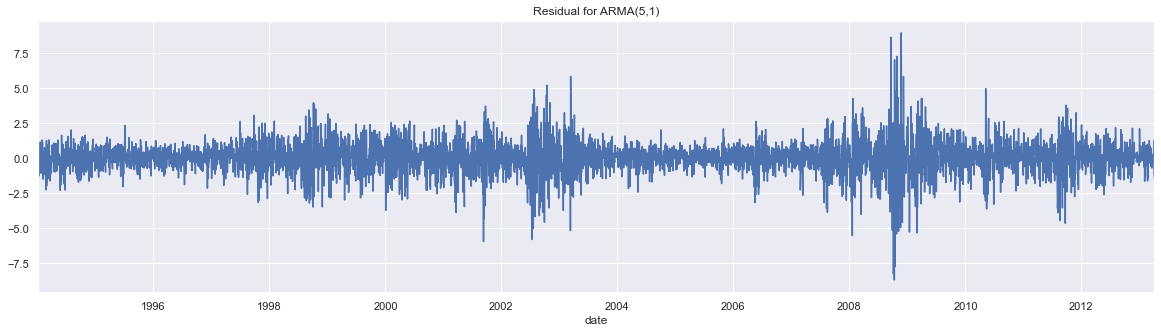

In [45]:
df['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid
df.res_ret_ar_5_ma_1.plot(figsize=(20,5))
plt.title("Residual for ARMA(5,1)")
plt.show()

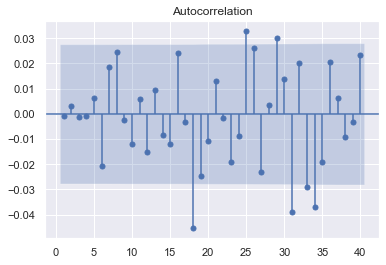

In [46]:
sgt.plot_acf(df.res_ret_ar_5_ma_1[1:],lags=40,zero=False)
plt.show()

In [ ]:
# Now most of the residuals are in significant which we are tring to achieve

In [ ]:
# Now let's find how ARMA performs with non-stationary data, ex. Market index prices

In [ ]:
# Reapply the same approach we used on returns
# see how using non-stationary data affects our work

In [ ]:
# Till now we have seen, the AR and MA models have failed at predicting non-staionary data on their own

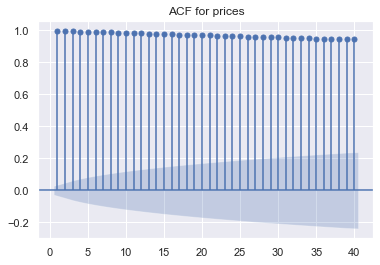

In [49]:
sgt.plot_acf(df.market_value, adjusted=True, zero=False, lags=40)
plt.title("ACF for prices")
plt.show()

# it's suggesting infinitely MA(inf) components

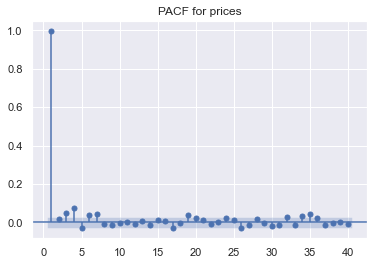

In [52]:
sgt.plot_pacf(df.market_value, zero=False, lags=40, alpha=0.05, method=('ols'))
plt.title("PACF for prices")
plt.show()

In [ ]:
# almost all the acf coeffs are significant and 6 of pacf are sig.

In [ ]:
# an MA(inf) (with certain restrictions) is equivalent to a simple AR model
# as long as we include AR components we should be able to describe the data well

In [53]:
model_ar_1_ma_1 = ARMA(df.market_value,order=(1,1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()
results_ar_1_ma_1.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 1)   Log Likelihood              -27621.789
Method:                       css-mle   S.D. of innovations             59.248
Date:                Sun, 04 Apr 2021   AIC                          55251.579
Time:                        15:56:52   BIC                          55277.664
Sample:                    01-07-1994   HQIC                         55260.719
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6410    496.785     10.245      0.000    4115.961    6063.321
ar.L1.market_value     0.9985      0.001   1323.195      0.000       0.997       1.000
ma.L1.market_value    -0.0190      0.015     -1.274      0.203      -0.048       0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
MA.1           52.5192           +0.0000j           52.5192            0.0000
-----------------------------------------------------------------------------
"""

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


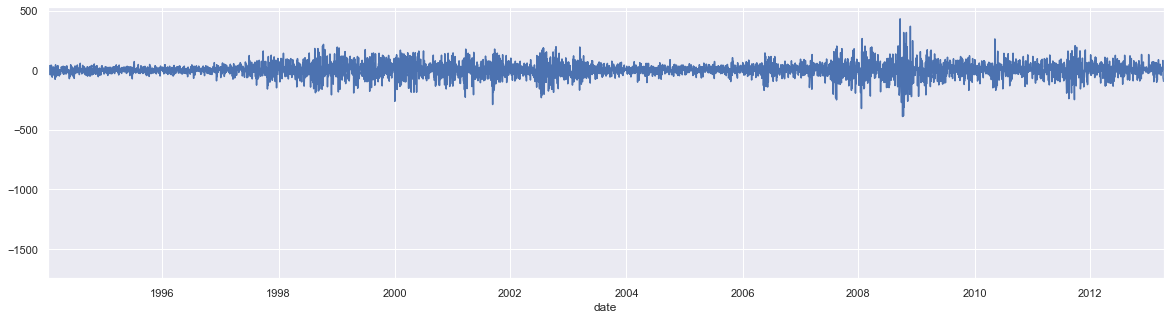

In [54]:
df['res_ar_1_ma_1'] = results_ar_1_ma_1.resid
df.res_ar_1_ma_1.plot(figsize=(20,5))
plt.show()

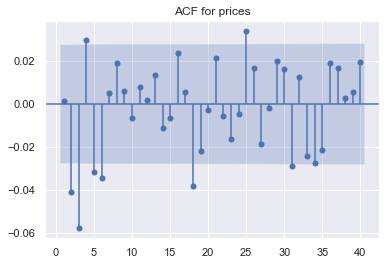

In [55]:
sgt.plot_acf(df.res_ar_1_ma_1, adjusted=True, zero=False, lags=40)
plt.title("ACF for prices")
plt.show()

In [56]:
model_ar_6_ma_6 = ARMA(df.market_value,order=(6,6))
results_ar_6_ma_6 = model_ar_6_ma_6.fit()
results_ar_6_ma_6.summary()

# This gives error

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [58]:
model_ar_6_ma_6 = ARMA(df.market_value,order=(6,6))
results_ar_6_ma_6 = model_ar_6_ma_6.fit(start_ar_lags=11) # Tested from 7 to 11 untill the error stopped
results_ar_6_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 6)   Log Likelihood              -27587.932
Method:                       css-mle   S.D. of innovations             58.849
Date:                Sun, 04 Apr 2021   AIC                          55203.864
Time:                        16:08:13   BIC                          55295.164
Sample:                    01-07-1994   HQIC                         55235.856
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6495    568.302      8.956      0.000    3975.798    6203.501
ar.L1.market_value     1.9275      0.032     59.895      0.000       1.864       1.991
ar.L2.market_value    -1.7358      0.040    -43.347      0.000      -1.814      -1.657
ar.L3.market_value     1.2675      0.034     36.757      0.000       1.200       1.335
ar.L4.market_value    -0.2373      0.157     -1.508      0.132      -0.546       0.071
ar.L5.market_value    -0.4063      0.165     -2.470      0.014      -0.729      -0.084
ar.L6.market_value     0.1841      0.049      3.771      0.000       0.088       0.280
ma.L1.market_value    -0.9486      0.035    -27.029      0.000      -1.017      -0.880
ma.L2.market_value     0.7799      0.032     24.169      0.000       0.717       0.843
ma.L3.market_value    -0.5083      0.031    -16.313      0.000      -0.569      -0.447
ma.L4.market_value    -0.1561      0.158     -0.988      0.323      -0.466       0.154
ma.L5.market_value     0.0953      0.057      1.682      0.093      -0.016       0.206
ma.L6.market_value     0.0670      0.024      2.807      0.005       0.020       0.114
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0856           -1.0503j            1.0537           -0.2370
AR.2            0.0856           +1.0503j            1.0537            0.2370
AR.3           -2.0252           -0.0000j            2.0252           -0.5000
AR.4            1.0011           -0.0000j            1.0011           -0.0000
AR.5            1.5302           -0.2682j            1.5535           -0.0276
AR.6            1.5302           +0.2682j            1.5535            0.0276
MA.1            0.1028           -1.0613j            1.0662           -0.2346
MA.2            0.1028           +1.0613j            1.0662            0.2346
MA.3            1.3621           -0.2800j            1.3906           -0.0323
MA.4            1.3621           +0.2800j            1.3906            0.0323
MA.5           -2.1763           -1.4334j            2.6059           -0.4073
MA.6           -2.1763           +1.4334j            2.6059            0.4073
-----------------------------------------------------------------------------
"""

In [60]:
# There are many non significant p values, we should lower the number of lags,
# we should try all models which contain either 6 AR lags or 6 MA lags
# by experimentaion it was found that ARMA(5,6) % ARMA(6,1) were superior
# However ARMA(4,6) contains only a single non-significant coefficient

In [59]:
model_ar_5_ma_6 = ARMA(df.market_value,order=(5,6))
results_ar_5_ma_6 = model_ar_5_ma_6.fit(start_ar_lags=7) 
results_ar_5_ma_6.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 6)   Log Likelihood              -27587.863
Method:                       css-mle   S.D. of innovations             58.849
Date:                Sun, 04 Apr 2021   AIC                          55201.726
Time:                        16:12:43   BIC                          55286.504
Sample:                    01-07-1994   HQIC                         55231.433
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6476    580.817      8.763      0.000    3951.268    6228.028
ar.L1.market_value     1.3585      0.177      7.657      0.000       1.011       1.706
ar.L2.market_value    -1.1290      0.237     -4.764      0.000      -1.594      -0.665
ar.L3.market_value     0.9148      0.229      4.003      0.000       0.467       1.363
ar.L4.market_value     0.0158      0.204      0.078      0.938      -0.383       0.415
ar.L5.market_value    -0.1613      0.119     -1.352      0.176      -0.395       0.072
ma.L1.market_value    -0.3797      0.178     -2.134      0.033      -0.728      -0.031
ma.L2.market_value     0.7294      0.125      5.832      0.000       0.484       0.975
ma.L3.market_value    -0.2198      0.153     -1.438      0.150      -0.519       0.080
ma.L4.market_value    -0.1387      0.114     -1.216      0.224      -0.362       0.085
ma.L5.market_value    -0.0879      0.017     -5.325      0.000      -0.120      -0.056
ma.L6.market_value     0.0265      0.024      1.129      0.259      -0.020       0.073
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0917           -1.0418j            1.0458           -0.2360
AR.2            0.0917           +1.0418j            1.0458            0.2360
AR.3            1.0010           -0.0000j            1.0010           -0.0000
AR.4            1.8977           -0.0000j            1.8977           -0.0000
AR.5           -2.9841           -0.0000j            2.9841           -0.5000
MA.1            0.1071           -1.0487j            1.0542           -0.2338
MA.2            0.1071           +1.0487j            1.0542            0.2338
MA.3           -1.5353           -1.5156j            2.1574           -0.3760
MA.4           -1.5353           +1.5156j            2.1574            0.3760
MA.5            1.5918           -0.0000j            1.5918           -0.0000
MA.6            4.5768           -0.0000j            4.5768           -0.0000
-----------------------------------------------------------------------------
"""

In [61]:
model_ar_6_ma_1 = ARMA(df.market_value,order=(6,1))
results_ar_6_ma_1 = model_ar_6_ma_1.fit(start_ar_lags=7) 
results_ar_6_ma_1.summary()

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 1)   Log Likelihood              -27594.195
Method:                       css-mle   S.D. of innovations             58.923
Date:                Sun, 04 Apr 2021   AIC                          55206.389
Time:                        16:14:38   BIC                          55265.082
Sample:                    01-07-1994   HQIC                         55226.956
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6422    586.475      8.678      0.000    3940.173    6239.111
ar.L1.market_value     1.3921      0.058     23.927      0.000       1.278       1.506
ar.L2.market_value    -0.4369      0.059     -7.399      0.000      -0.553      -0.321
ar.L3.market_value    -0.0101      0.025     -0.409      0.683      -0.059       0.038
ar.L4.market_value     0.1126      0.025      4.527      0.000       0.064       0.161
ar.L5.market_value    -0.1158      0.025     -4.717      0.000      -0.164      -0.068
ar.L6.market_value     0.0573      0.014      4.067      0.000       0.030       0.085
ma.L1.market_value    -0.4126      0.060     -6.924      0.000      -0.529      -0.296
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           -0.0000j            1.0010           -0.0000
AR.2           -1.7608           -0.0000j            1.7608           -0.5000
AR.3           -0.0803           -1.8407j            1.8425           -0.2569
AR.4           -0.0803           +1.8407j            1.8425            0.2569
AR.5            1.4694           -0.8691j            1.7072           -0.0850
AR.6            1.4694           +0.8691j            1.7072            0.0850
MA.1            2.4234           +0.0000j            2.4234            0.0000
-----------------------------------------------------------------------------
"""

In [64]:
print("ARMA (5,6) ",results_ar_5_ma_6.llf,results_ar_5_ma_6.aic)
print("ARMA (6,1) ",results_ar_6_ma_1.llf,results_ar_6_ma_1.aic)


ARMA (5,6)  -27587.86294816811 55201.72589633622
ARMA (6,1)  -27594.194571019987 55206.389142039974


C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


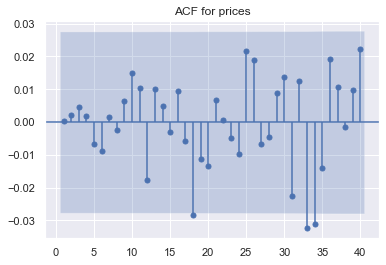

In [66]:
df['res_ar_5_ma_6'] = results_ar_5_ma_6.resid
sgt.plot_acf(df.res_ar_5_ma_6, adjusted=True, zero=False, lags=40)
plt.title("ACF for prices")
plt.show()

In [ ]:
# Residuals seems white noise

In [67]:
print("ARMA (5,6) ",results_ar_5_ma_6.llf,results_ar_5_ma_6.aic)
print("ARMA (5,1) ",results_ret_ar_5_ma_1.llf,results_ret_ar_5_ma_1.aic," Returns")

ARMA (5,6)  -27587.86294816811 55201.72589633622
ARMA (5,1)  -7889.311282945808 15794.622565891616  Returns


In [ ]:
# It's clear ARMA has hard time in dealing with non staionary data, although they they can predict non stationary data

In [ ]:
# Now it's time for ARIMA model which does this job better
# It accounts for the number of non-seasonal differences we need to examine to establish stationarity